In [1]:
using FileIO
using CSV
using DataFrames
using Statistics
using StatsPlots, Interact
using Blink



 +++++ Lowest Engagement - Top 5 Headlines +++++ 

["China launches 'unhackable', quantum-secured smartphone" </br>
 'Microsoft Says Its Had a Breakthrough in Quantum Computer System' </br>
 'Trump signs legislation to boost quantum computing research with $1.2 billion' </br>
 'Amazon is opening a center for quantum networking research | Engadget' </br>
 'Fluxonium qubits bring the creation of a quantum computer closer' </br>]

 +++++ Highest Engagement - Top 5 Headlines +++++ 

['Quantum interaction: 10,000 times faster than light' </br>
 'The case against dark matter' </br>
 'Quantum Teleportation Enters the Real World' </br>
 "Quantum 'spookiness' passes toughest test yet" </br>
 'Quantum microphone counts particles of sound | Stanford News' </br>]

 +++++ Lowest sentiment - Top 5 Headlines +++++ 

["China launches 'unhackable', quantum-secured smartphone" </br>
 "Researchers create an 'un-hackable' quantum network over hundreds of kilometers using optical fiber" </br>
 'U.S. hatches plan to build a quantum Internet that might be unhackable' </br>
 'US blacklists Chinese quantum computing firms over security fears' </br>
 'UK military wants to install quantum computers in tanks' </br>]

 +++++ Highest sentiment - Top 5 Headlines +++++ 

['NIST Quantum Refrigerator Offers Extreme Cooling and Convenience' </br>
 'A quantum computer just solved a decades-old problem three million times faster than a classical computer' </br>
 'Open-air quantum teleportation performed across a 97km lake' </br>
 'Engineers crack 58-year-old puzzle on way to quantum breakthrough' </br>
 'Two Diamonds Linked by Strange Quantum Entanglement' </br>]

In [2]:
GPT4_inst_labels = ["A", "B", "C", "D", "E", "F", "G", "H"]
dirpath = "S:\\Sync\\University\\2023_MRP_1\\MRP1_WorkDir\\data\\annotated"
filename = "annot_full.csv"

df = CSV.read(joinpath(dirpath, filename), DataFrame)
#df = df[1:123, 1:end]
#Drop irrelevant columns:
#select!(df, Not([Symbol("batch_#"),Symbol("cmt_#_in_Batch"), Symbol("engagement_human"), Symbol("sentiment_human"), Symbol("engagement_human_final"),  Symbol("sentiment_human_final"),  Symbol("selected_for_check"),  Symbol("engagement_maj_agreement"),  Symbol("sentiment_maj_agreement"),  Symbol("engagement_final_maj_agreement"),  Symbol("sentiment_final_maj_agreement")]))	
select!(df, Not([Symbol("batch_#"),Symbol("cmt_#_in_Batch"), Symbol("engagement_human"), Symbol("sentiment_human"), Symbol("selected_for_check"),  Symbol("engagement_maj_agreement"),  Symbol("sentiment_maj_agreement")]))	

#Print header (column names and column data types) of the dataframe
@show names(df)
@show eltype.(eachcol(df))

#Change annotation columns to integers
for inst_label in GPT4_inst_labels
    if eltype(df[!,Symbol("engagement_GPT4_"*inst_label)]) .!= Int64
        df[!,Symbol("engagement_GPT4_"*inst_label)] =  convert.(Union{Int64, Missing}, df[!,Symbol("engagement_GPT4_"*inst_label)])
    end
    if eltype(df[!,Symbol("sentiment_GPT4_"*inst_label)]) .!= Int64
        df[!,Symbol("sentiment_GPT4_"*inst_label)] = convert.(Union{Int64, Missing}, df[!,Symbol("sentiment_GPT4_"*inst_label)])
    end
end

names(df) = ["cmt_id", "comment_body", "engagement_GPT4_A", "engagement_GPT4_B", "engagement_GPT4_C", "engagement_GPT4_D", "engagement_GPT4_E", "engagement_GPT4_F", "engagement_GPT4_G", "engagement_GPT4_H", "sentiment_GPT4_A", "sentiment_GPT4_B", "sentiment_GPT4_C", "sentiment_GPT4_D", "sentiment_GPT4_E", "sentiment_GPT4_F", "sentiment_GPT4_G", "sentiment_GPT4_H", "engagement_GPT4_majority", "sentiment_GPT4_majority", "article_id", "article_headline"]


eltype.(eachcol(df)) = Union[Union{Missing, String7}, Union{Missing, String}, Union{Missing, Int64}, Union{Missing, Int64}, Union{Missing, Float64}, Union{Missing, Float64}, Union{Missing, Int64}, Union{Missing, Int64}, Union{Missing, Int64}, Union{Missing, Int64}, Union{Missing, Int64}, Union{Missing, Int64}, Union{Missing, Float64}, Union{Missing, Float64}, Union{Missing, Int64}, Union{Missing, Int64}, Union{Missing, Int64}, Union{Missing, Int64}, Union{Missing, Int64}, Union{Missing, Int64}, Union{Missing, String}, Union{Missing, String}]


In [3]:

cmt_info_df = CSV.read(joinpath("S:\\Sync\\University\\2023_MRP_1\\MRP1_WorkDir\\data\\annotated", "r_cmt_stratified_annotated.csv"), DataFrame)


4920×29 DataFrame
  Row │ comment_id  article_id                         date       username     ⋯
      │ String7     String                             Float64    String31     ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ c1egwpd     2e61a3b5db1353cdfe631e5d3503b0d1…  1.29617e9  tardibear    ⋯
    2 │ c1eh028     2e61a3b5db1353cdfe631e5d3503b0d1…  1.29617e9  iorgfeflkd
    3 │ c1eh442     2e61a3b5db1353cdfe631e5d3503b0d1…  1.29617e9  dmorg18
    4 │ c1eh4p3     2e61a3b5db1353cdfe631e5d3503b0d1…  1.29617e9  christianjb
    5 │ c1eh6up     2e61a3b5db1353cdfe631e5d3503b0d1…  1.29618e9  KarmaIsCheap ⋯
    6 │ c1eh8d0     2e61a3b5db1353cdfe631e5d3503b0d1…  1.29618e9  Lurking_Grue
    7 │ c1ehe0n     2e61a3b5db1353cdfe631e5d3503b0d1…  1.29618e9  FarFromHome
    8 │ c1ehelc     2e61a3b5db1353cdfe631e5d3503b0d1…  1.29618e9  croutonicus
  ⋮   │     ⋮                       ⋮                      ⋮            ⋮      ⋱
 4914 │ j8md131     65d178ab1755fe72794383d2a04084c8…  1.67646e9  Naiko32      ⋯
 4915 │ j8mklru     65d178ab1755fe72794383d2a04084c8…  1.67646e9  JakeBeezy
 4916 │ j8mqks6     65d178ab1755fe72794383d2a04084c8…  1.67647e9  Deathdar1577
 4917 │ j8muwo1     65d178ab1755fe72794383d2a04084c8…  1.67647e9  joeyjiggle
 4918 │ j8n8z3l     65d178ab1755fe72794383d2a04084c8…  1.67648e9  jbae_94      ⋯
 4919 │ j8q0hq1     65d178ab1755fe72794383d2a04084c8…  1.67652e9  Peesha_Deel
 4920 │ j8qo5c6     65d178ab1755fe72794383d2a04084c8…  1.67653e9  graspme
                                                26 columns and 4905 rows omitted

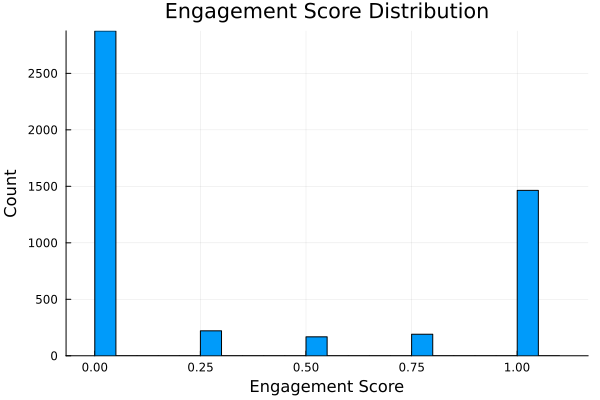

In [4]:
# Add a score column to the dataframe

df[!, :engagement_score] = zeros(Float64, size(df,1))
for inst_label in GPT4_inst_labels
    df[!, :engagement_score] .+= (df[!, Symbol("engagement_GPT4_$inst_label")] ./ 8)
end

df[!, :sentiment_score] = zeros(Float64, size(df,1))
for inst_label in GPT4_inst_labels
    df[!, :sentiment_score] .+= (df[!, Symbol("sentiment_GPT4_$inst_label")] ./ (8*2))
end

# Plot score distribution as histogram
@df df histogram(:engagement_score, bins=0.0:0.05:1.1, xlabel="Engagement Score", ylabel="Count", title="Engagement Score Distribution", legend=false)

In [5]:
@df df histogram(:sentiment_score, bins=0.0:0.05:1.1, xlabel="Sentiment Score", ylabel="Count", title="Sentiment Score Distribution", legend=false)

In [7]:
# For each unique article id, calculate the mean and std of engagement score per article
df_mean_scores = combine(groupby(df, :article_id), :engagement_score => mean, :sentiment_score => mean)
df_std_scores = combine(groupby(df, :article_id), :engagement_score => std, :sentiment_score => std)

dropmissing!(df_mean_scores, :article_id)
dropmissing!(df_std_scores, :article_id)

@assert size(df_mean_scores,1) == 123
@assert size(df_std_scores,1) == 123

# Plot mean score distribution as histogram
plt = @df df_mean_scores histogram(:engagement_score_mean, bins=0.0:0.02:1.1, xlabel="Mean Article Score", ylabel="Article Count", legend=true, label="Engagement", alpha=0.8)
#@df df_mean_scores histogram!(:sentiment_score_mean, bins=0.0:0.02:1.1, label="Sentiment", alpha=0.5)
#savefig(plt, "./output_and_results/mean_art_score_engagement.png")

#Mean of mean of histograms:
#@show median(df_mean_scores[!, :sentiment_score_mean])

# Complete figure description:
# Figure X: Distribution of mean article scores for (a) engagement and (b) sentiment

# Show the standard deviation in the distribution of mean engagement and sentiment scores
@show std(df_mean_scores[!, :engagement_score_mean])
@show std(df_mean_scores[!, :sentiment_score_mean])

std(df_mean_scores[!, :engagement_score_mean]) = 0.1286056790738936
std(df_mean_scores[!, :sentiment_score_mean]) = 0.08145701713988061


0.08145701713988061

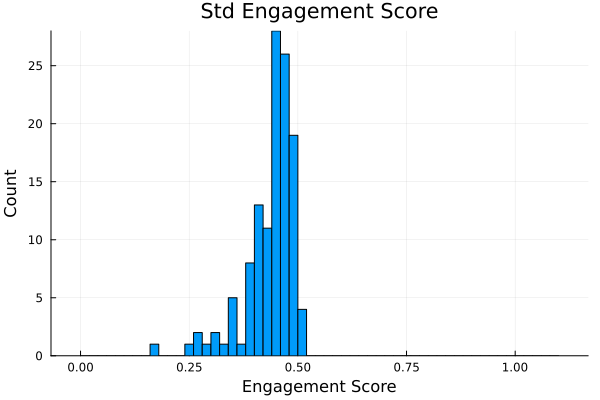

In [8]:
@df df_std_scores histogram(:engagement_score_std, bins=0.0:0.02:1.1, xlabel="Engagement Score", ylabel="Count", title="Std Engagement Score", legend=false)

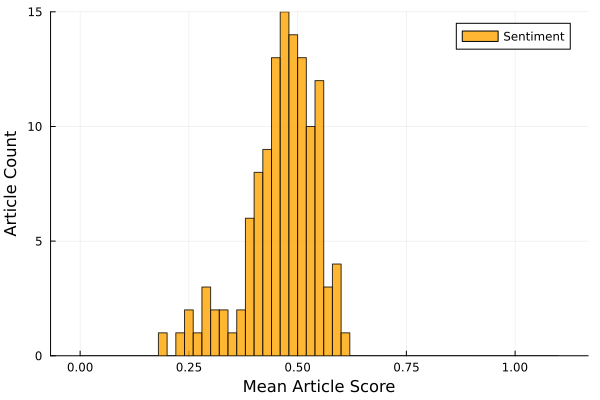

In [9]:
# Plot mean score distribution as histogram

plt = @df df_mean_scores histogram(:sentiment_score_mean, bins=0.0:0.02:1.1, xlabel="Mean Article Score", ylabel="Article Count", legend=true, label="Sentiment", color=:orange, alpha=0.8)
#savefig(plt, "./output_and_results/mean_art_score_sentiment.png")
#@df df_mean_scores histogram!(:engagement_score_mean, bins=0.0:0.02:1.1, label="Engagement", alpha=0.3, color=:blue)


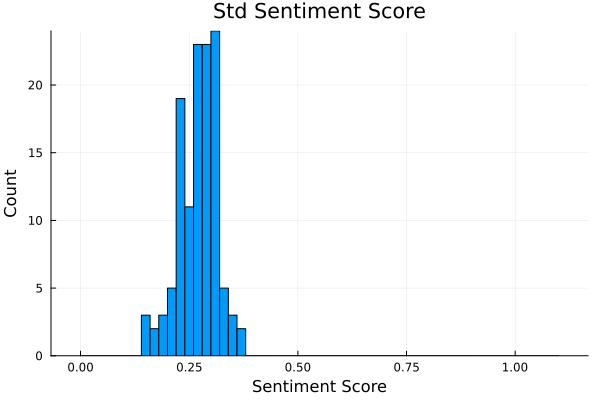

In [10]:
@df df_std_scores histogram(:sentiment_score_std, bins=0.0:0.02:1.1, xlabel="Sentiment Score", ylabel="Count", title="Std Sentiment Score", legend=false)

In [11]:
using StatsPlots
#Remove missing values
df = dropmissing(df)

#boxplot(repeat([1,2,3],outer=100),randn(300))
StatsPlots.violin(fill("Engagment score", size(df)[2]),  df[!,:engagement_score], fillalpha=0.4, linewidth=1, legend=false)
StatsPlots.violin!(fill("Sentiment score", size(df)[2]),  df[!,:sentiment_score], fillalpha=0.4, linewidth=1)

size(art_df) = (123, 25)


size(first_engagement_scores) = (1, 122)


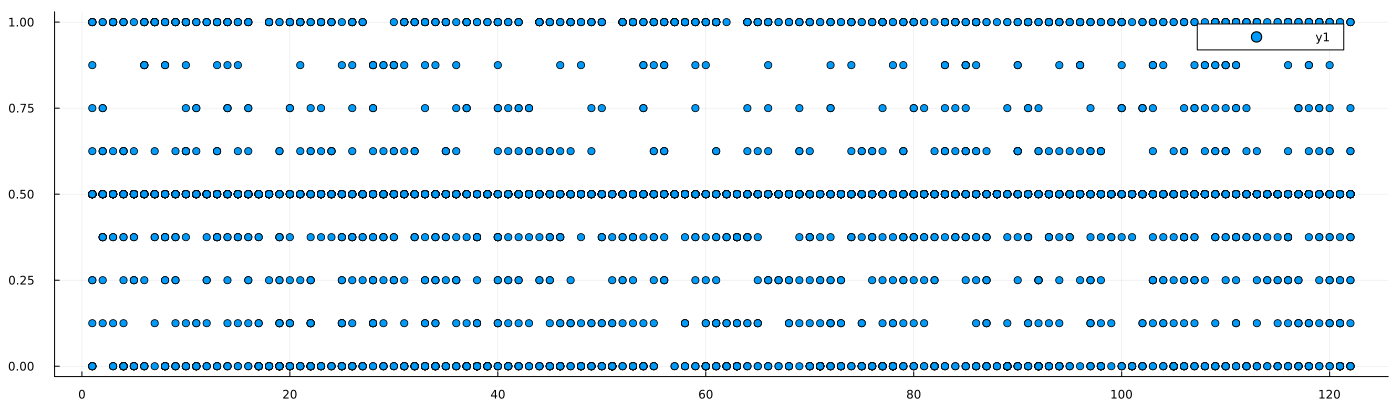

size(engagement_score_data) = (40, 122)


In [14]:
grouped_df = groupby(df, :article_id)

art_id_keys = keys(grouped_df)[1:end-1]

engagement_score_data = Array{Float64}(undef, (40, 0))
sentiment_score_data = Array{Float64}(undef, (40, 0))
first_engagement_scores = Array{Float64}(undef, (1,0))
first_sentiment_scores = Array{Float64}(undef, (1,0))

#-----
sort!(art_id_keys)
#------

for art_id_key in art_id_keys
    engagement_score_data = cat(engagement_score_data, reshape(grouped_df[art_id_key][!, :engagement_score], :, 1), dims=2)
    sentiment_score_data = cat(sentiment_score_data, reshape(grouped_df[art_id_key][!, :sentiment_score], :, 1), dims=2)
    
    art_cmt_ids = grouped_df[art_id_key][!, :cmt_id]
    art_cmt_rows = filter(:comment_id => id -> id in art_cmt_ids, cmt_info_df)
    #cmt_info_df[cmt_info_df[!, :comment_id] in art_cmt_ids, [:comment_id, :date, :engagement_score, :sentiment_score]]
    #Get the rows with the lowest date
    #first_cmt_row = art_cmt_rows[findmin(art_cmt_rows[!, :date])[2], :]
    #first_engagement_scores = cat(first_engagement_scores, [first_cmt_row[:engagement_score],], dims=2)
    #first_sentiment_scores = cat(first_sentiment_scores, [first_cmt_row[:sentiment_score],], dims=2)

    #Get the k rows with the k lowest dates
    k=40
    first_cmt_rows = art_cmt_rows[sortperm(art_cmt_rows[!, :date])[1:k], :]
    #Store now the mean of the k rows
    first_engagement_scores = cat(first_engagement_scores, [mean(first_cmt_rows[!, :engagement_score]),], dims=2)
    first_sentiment_scores = cat(first_sentiment_scores, [mean(first_cmt_rows[!, :sentiment_score]),], dims=2)    

end

#-------
art_filepath = "S:\\Sync\\University\\2023_MRP_1\\MRP1_WorkDir\\data\\annotated\\r_art_stratified_annotated.csv"
art_df = CSV.read(art_filepath, DataFrame)
@show size(art_df)
#Remove last row 
art_df = art_df[1:end-1, :]
#sort art_df by article_id
sort!(art_df, :article_id)
@show size(first_engagement_scores)
#add first_engagement_scores and first_sentiment_scores to art_df
art_df[!, :first_engagement_score] = reshape(first_engagement_scores,:)
art_df[!, :first_sentiment_score] = reshape(first_sentiment_scores,:)
#save art_df to new csv file
CSV.write("S:\\Sync\\University\\2023_MRP_1\\MRP1_WorkDir\\data\\annotated\\r_art_stratified_annotated_with_first_scores.csv", art_df)
art_df = nothing
#-------

@show size(engagement_score_data)

scat1 = scatter(repeat(1:length(art_id_keys), 40), reshape(transpose(engagement_score_data), :, 1), size=(1400, 400))
scat2 = scatter(repeat(1:length(art_id_keys), 40), reshape(transpose(sentiment_score_data), :, 1), size=(1400, 400))

display(scat1)
display(scat2)


In [32]:
#Plot the scatter of mean engagement_score_data value along the second dimension against the first_engagement_scores_data value

scatter(reshape(mean(engagement_score_data, dims=1),:), reshape(first_engagement_scores, :), legend=false)
# Make a fit with a logistic function

using LsqFit

# Define the logistic function
logistic(x, p) = 1 ./ (1 .+ exp.(-(x .- p[1]) ./ p[2]))
#logistic(x, p) = 0.5 .* tanh.((x .- p[1]) ./ p[2]) .+ 0.5

# Define the error function
function logistic_error(p, x, y)
    ypred = logistic(x, p)
    return ypred .- y
end

# Define the initial parameters
p0 = [median(first_engagement_scores), 0.1]

# Fit the logistic function
fit = curve_fit(logistic, reshape(mean(engagement_score_data, dims=1),:), reshape(first_engagement_scores, :), p0)# lower=[0.0, 0.0], upper=[1.0, 1.0])

# Plot the fit as a line plot
plot!(0:0.01:0.75 , x->logistic(x, fit.param), legend=false)

In [13]:

anim = @animate for art_idx in 1:length(art_id_keys)
    StatsPlots.histogram(engagement_score_data[:, art_idx], bins=0.0:0.05:1.1, xlabel="Engagement Score", ylabel="Count", title="Engagement Score Distribution", legend=false)
end

#display(gif(anim, "art_engagement_score_distrib_anim.gif", fps = 1))

Animation("C:\\Users\\trothe\\AppData\\Local\\Temp\\jl_PtEUvZ", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000113.png", "000114.png", "000115.png", "000116.png", "000117.png", "000118.png", "000119.png", "000120.png", "000121.png", "000122.png"])

In [14]:
anim = @animate for art_idx in 1:length(art_id_keys)
    #StatsPlots.histogram(engagement_score_data[:, art_idx], bins=0.0:0.05:1.1, xlabel="Engagement Score", ylabel="Count", title="Engagement Score Distribution", legend=false)
    violin(fill("Engagment score", size(engagement_score_data)[1]),  engagement_score_data[:, art_idx], fillalpha=0.4, linewidth=1, legend=false)
end

#display(gif(anim, "art_engagement_score_violin_anim.gif", fps = 1))

Animation("C:\\Users\\trothe\\AppData\\Local\\Temp\\jl_z9OzQw", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000113.png", "000114.png", "000115.png", "000116.png", "000117.png", "000118.png", "000119.png", "000120.png", "000121.png", "000122.png"])

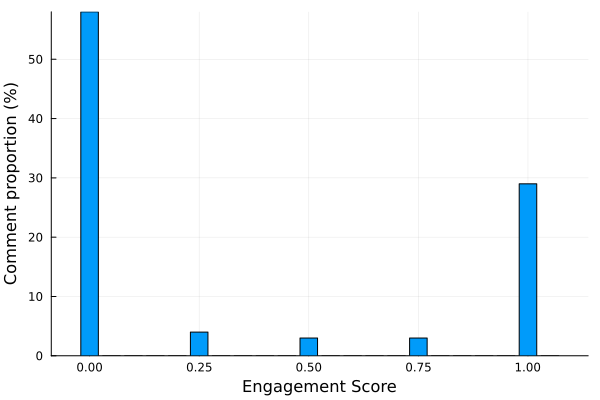

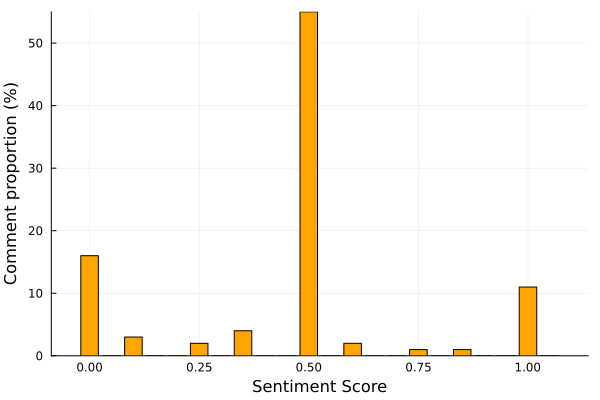

(size((collect(0.0:0.05:1.1) .- 0.025)[1:end - 1]), size(mean_engagement_weights), size(mean_sentiment_weights)) = ((22,), (22,), (22,))


In [15]:
v = violin(fill("Engagment score", size(engagement_score_data)[1]),  engagement_score_data[:, 1], fillalpha=0.4, linewidth=1, legend=false)

using StatsBase, LinearAlgebra


weights = zeros(length(0.0:0.05:1.1) -1 )
for art_idx in 1:length(art_id_keys)
    h = fit(Histogram, engagement_score_data[:, art_idx], 0.0:0.05:1.1).weights
    weights .+= normalize(h, 1)
end

mean_engagement_weights = weights ./ length(art_id_keys)


weights = zeros(length(0.0:0.05:1.1) -1 )
for art_idx in 1:length(art_id_keys)
    h = fit(Histogram, sentiment_score_data[:, art_idx], 0.0:0.05:1.1).weights
    weights .+= normalize(h, 1)
end

mean_sentiment_weights = weights ./ length(art_id_keys)

#groupedbar( [collect(0.0:0.05:1.1) .- 0.025, collect(0.0:0.05:1.1) .- 0.025], [floor.(100 .* normalize(mean_engagement_weights, 1)), floor.(100 .* normalize(mean_sentiment_weights, 1))], bar_position = :dodge, bar_width=0.9, legend=false)

@show size((collect(0.0:0.05:1.1) .- 0.025)[1:end-1]), size(mean_engagement_weights), size(mean_sentiment_weights)

plt = bar( (collect(0.0:0.05:1.1))[1:end-1], floor.(100 .* normalize(mean_engagement_weights, 1)), legend=false)
xlabel!("Engagement Score")
ylabel!("Comment proportion (%)")
display(plt)

plt =bar( (collect(0.0:0.05:1.1))[1:end-1], floor.(100 .* normalize(mean_sentiment_weights, 1)), legend=false, color=:orange)
xlabel!("Sentiment Score")
ylabel!("Comment proportion (%)")
display(plt)

In [16]:
using Distances

grouped_df = groupby(df, :article_id)

engagement_num_bins = 5
sentiment_num_bins = 9

art_engagement_hists = []
art_sentiment_hists = []

for (art_id, group) in zip(keys(grouped_df) ,grouped_df)
    engagement_scores = group[!,:engagement_score]
    sentiment_scores = group[!,:sentiment_score]

    engagement_bin_edges = range(0.0-(1.0-0.0)/(2*(engagement_num_bins-1)), 1.0 + (1.0-0.0)/(2*(engagement_num_bins-1)), length=engagement_num_bins+1)
    sentiment_bin_edges = range(0.0-(1.0-0.0)/(2*(sentiment_num_bins-1)), 1.0 + (1.0-0.0)/(2*(sentiment_num_bins-1)), length=sentiment_num_bins+1)
    engagement_score_hist = fit(Histogram, engagement_scores, engagement_bin_edges).weights
    sentiment_score_hist = fit(Histogram, sentiment_scores, sentiment_bin_edges).weights
    push!(art_engagement_hists, normalize(engagement_score_hist))
    push!(art_sentiment_hists, normalize(sentiment_score_hist))
end

art_engagement_hists = hcat(art_engagement_hists...)
art_sentiment_hists = hcat(art_sentiment_hists...)


dist = JSDivergence()
#dist = KLDivergence()
#dist = GenKLDivergence()
#dist = Euclidean()
#dist = Jaccard()
#dist = HellingerDist()

#dist = RMSDeviation()
#dist = TotalVariation()
#dist = ChiSqDist()


pairwise_engagement_distances = pairwise(dist, art_engagement_hists, dims=2)
pairwise_sentiment_distances = pairwise(dist, art_sentiment_hists, dims=2)


unique_engagement_dist_vals = pairwise_engagement_distances[triu!(trues(size(pairwise_engagement_distances)), 1)]
unique_sentiment_dist_vals = pairwise_sentiment_distances[triu!(trues(size(pairwise_sentiment_distances)), 1)]
#bins=-0.5:0.01:1.0
StatsPlots.histogram(unique_engagement_dist_vals, bins=200,normalize=:probability, xlabel="Distance", ylabel="Count", legend=true, label="Engagement", alpha=0.5)
StatsPlots.histogram!(unique_sentiment_dist_vals, bins=200,normalize=:probability, xlabel="Distance", ylabel="Count", legend=true, label="Sentiment", alpha=0.5)

#@show pairwise_engagement_distances
#@show pairwise_sentiment_distances


ArgumentError: ArgumentError: Package Distances not found in current path.
- Run `import Pkg; Pkg.add("Distances")` to install the Distances package.

In [17]:
using Distributions


dist = ChiSqDist()

pairwise_engagement_distances = pairwise(dist, reshape([mean(grouped_df[i][!,:engagement_score]) for i in 1:length(art_id_keys)],(1,:)), dims=2)

unique_engagement_dist_vals = pairwise_engagement_distances[triu!(trues(size(pairwise_engagement_distances)), 1)]

# Compute the p-value
p_value = ccdf.(Chisq(5-1),unique_engagement_dist_vals)

#StatsPlots.histogram(p_value, bins=100,normalize=:probability, xlabel="p-value", ylabel="Prob.", legend=true, label="Engagement", alpha=0.5)


UndefVarError: UndefVarError: `ChiSqDist` not defined

In [18]:
using Clustering

n_clusters = 3
engagement_clusters = kmeans(art_engagement_hists, n_clusters)
sentiment_clusters = kmeans(art_sentiment_hists, n_clusters)

@show engagement_clusters
@show sentiment_clusters

colors =[RGB(1.0 - x/2, 1/x, x) for x in range(0, 1, length=n_clusters)]

#parcoords([[artgroup[!,:engagement_score][i] for artgroup in grouped_df] for i in 1:5], color=[colors[c] for c in engagement_clusters.assignments], legend=false)
#scatter([mean(artgroup[!,:engagement_score]) for artgroup in grouped_df], [mean(artgroup[!,:sentiment_score]) for artgroup in grouped_df], color=[colors[c] for c in engagement_clusters.assignments], legend=false)
#@show size(stack([[artgroup[!,:engagement_score][i] for artgroup in grouped_df] for i in 1:5]))
#cornerplot(transpose(art_engagement_hists))#, color=[colors[c] for c in engagement_clusters.assignments])
#andrewsplot(transpose(art_engagement_hists), color=[colors[c] for c in engagement_clusters.assignments], legend=false)

#anim = @animate for i in 2:length(art_id_keys)
#    qqplot(grouped_df[1][!,:engagement_score], grouped_df[i][!,:engagement_score])
#end

#gif(anim, fps=1)
qqplot(grouped_df[1][!,:engagement_score], grouped_df[2][!,:engagement_score])

ArgumentError: ArgumentError: Package Clustering not found in current path.
- Run `import Pkg; Pkg.add("Clustering")` to install the Clustering package.

(names(art_df), size(art_df)) = (["article_id", "article_type", "from_where", "link", "post_id", "posted_by", "date_posted", "post_title", "post_body", "date", "author", "headline", "body", "char_count", "comments_ids", "num_tld_comments", "selected", "engagement_scores", "sentiment_scores", "avg_engagement_score", "avg_sentiment_score", "std_engagement_score", "std_sentiment_score", "engagement_score_sum", "sentiment_score_sum"], (123, 25))
any(ismissing.(art_df[!, :article_id])) = false
size(df_mean_scores[!, :article_id]) = (123,)

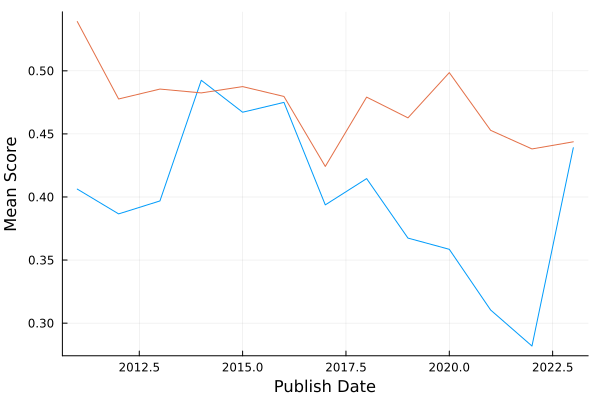

In [20]:
using Dates

art_filepath = "S:\\Sync\\University\\2023_MRP_1\\MRP1_WorkDir\\data\\annotated\\r_art_stratified_annotated.csv"
art_df = CSV.read(art_filepath, DataFrame)

art_df[!, :date_posted] = String.(art_df[!, :date_posted])


@show names(art_df), size(art_df)
@show any(ismissing.(art_df[!, :article_id]))

#@show names(df_mean_scores)
publication_dates = []


@show size(df_mean_scores[!, :article_id])

for art_id in df_mean_scores[!, :article_id]
    #@show art_df[!,:article_id] .== art_id
    publish_date = art_df[art_df[!,:article_id] .== art_id, :date][1]
    push!(publication_dates, publish_date)
end

month_idx(in_date) = Dates.year(in_date) #* 12 + Dates.month(in_date)


df_mean_scores[!,:publish_yearmonth] = month_idx.(publication_dates)
sort!(df_mean_scores, :publish_yearmonth)

df_mean_scores_over_time = combine(groupby(df_mean_scores, :publish_yearmonth), :engagement_score_mean => mean, :sentiment_score_mean => mean)

#month_array = minimum(df_mean_scores_over_time[!,:publish_yearmonth]):maximum(df_mean_scores_over_time[!,:publish_yearmonth])

plot(df_mean_scores_over_time[!,:publish_yearmonth], df_mean_scores_over_time[!,:engagement_score_mean_mean], seriestype=:line, legend=false, xlabel="Publish Date", ylabel="Mean Score")
plot!(df_mean_scores_over_time[!,:publish_yearmonth], df_mean_scores_over_time[!,:sentiment_score_mean_mean], seriestype=:line, legend=false, xlabel="Publish Date", ylabel="Mean Score")

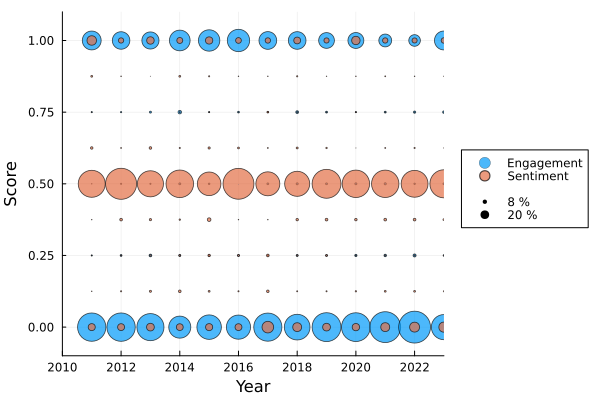

In [26]:
grouped_df = groupby(df, :article_id)

engagement_num_bins = 5
sentiment_num_bins = 9

publication_dates = []
art_engagement_hists = []
art_sentiment_hists = []

n_articles = length(keys(grouped_df))

for (art_id, group) in zip(keys(grouped_df) ,grouped_df)
    engagement_scores = group[!,:engagement_score]
    sentiment_scores = group[!,:sentiment_score]
    publish_date = art_df[art_df[!,:article_id] .== group[!, :article_id][1], :date][1]

    engagement_bin_edges = range(0.0-(1.0-0.0)/(2*(engagement_num_bins-1)), 1.0 + (1.0-0.0)/(2*(engagement_num_bins-1)), length=engagement_num_bins+1)
    sentiment_bin_edges = range(0.0-(1.0-0.0)/(2*(sentiment_num_bins-1)), 1.0 + (1.0-0.0)/(2*(sentiment_num_bins-1)), length=sentiment_num_bins+1)
    engagement_score_hist = fit(Histogram, engagement_scores, engagement_bin_edges).weights
    sentiment_score_hist = fit(Histogram, sentiment_scores, sentiment_bin_edges).weights
    push!(art_engagement_hists, normalize(engagement_score_hist))
    push!(art_sentiment_hists, normalize(sentiment_score_hist))
    push!(publication_dates, publish_date)
end

df_art_score_hists = DataFrame(article_id=keys(grouped_df), engagement_score_hist=art_engagement_hists, sentiment_score_hist=art_sentiment_hists, publish_date=publication_dates)


#art_engagement_hists = hcat(art_engagement_hists...)
#art_sentiment_hists = hvat(art_sentiment_hists...)

#isnonzero(x) = x != 0.0
#art_engagement_mask = map(isnonzero, art_engagement_hists)

#reduc_art_engagement_hists = art_engagement_hists[art_engagement_mask]
#reduc_art_score_bins = repeat(range(0.0, 1.0, length=engagement_num_bins), outer=n_articles)#[art_engagement_mask]

#@show size(reduc_art_score_bins), size(art_engagement_mask)

df_art_score_hists[!,:publish_year] = Dates.year.(publication_dates)

vecmean(x...) = mean(Array(x...), dims=1)

df_mean_score_hists = combine(groupby(df_art_score_hists, :publish_year), :engagement_score_hist => vecmean, :sentiment_score_hist => vecmean)

#reduc_engagement_publication_years = publication_years[art_engagement_mask]

n_years = length(unique(df_mean_score_hists[!, :publish_year]))

plt = scatter(Int.(repeat(df_mean_score_hists[!, :publish_year], inner=engagement_num_bins)) , repeat(range(0.0, 1.0, length=engagement_num_bins), outer=n_years), markersize = reshape(vcat([normalize(s_hist, 1) for s_hist in df_mean_score_hists[!,:engagement_score_hist_vecmean]]...), :)*28, label="Engagement",alpha=0.7, legend=:outerright)
scatter!(Int.(repeat(df_mean_score_hists[!, :publish_year], inner=sentiment_num_bins)) , repeat(range(0.0, 1.0, length=sentiment_num_bins), outer=n_years), markersize = reshape(vcat([normalize(s_hist, 1) for s_hist in df_mean_score_hists[!,:sentiment_score_hist_vecmean]]...), :)*28, label="Sentiment",alpha=0.7)
xlabel!("Year")
ylabel!("Score")
xlims!(2010, 2023)
ylims!((-0.1, 1.1))

# Add empty legend entry for separation
x=Int.(repeat(df_mean_score_hists[!, :publish_year]))
scatter!(x, NaN*x, label=" ", alpha=0.0)

# Add dummy series for the markersizes
scatter!(x, NaN*x, markersize=0.3, label="8 %", color=:black, markerstrokewidth=1)
scatter!(x, NaN*x, markersize=1.5, label="20 %", color=:black, markerstrokewidth=1)


#Save plot to file:
#savefig(plt, "./output_and_results/score_histograms.png")

In [22]:
@show [normalize(s_hist, 1) for s_hist in df_mean_score_hists[!,:sentiment_score_hist_vecmean]]

[normalize(s_hist, 1) for s_hist = df_mean_score_hists[!, :sentiment_score_hist_vecmean]] = [[0.13943085342961314, 0.01288617068592263, 0.01288617068592263, 0.012113829314077366, 0.536341487942232, 0.04922765862815472, 0.012113829314077366, 0.03711382931407736, 0.18788617068592262], [0.13701932669434932, 0.025024804788162488, 0.02405158687974771, 0.05271422613748324, 0.6155692583999013, 0.01931826237694362, 0.0073230369682738316, 0.014060876872087891, 0.10491862088305086], [0.15281607592870194, 0.04216270367496723, 0.03313463365402908, 0.04415351487546267, 0.5183856336767323, 0.05103952037446577, 0.0038564299152406027, 0.006374289579180718, 0.14807719832121968], [0.1347007645859109, 0.05202839123737279, 0.03504928441996737, 0.029912303432211088, 0.5474733597510424, 0.025000000000000012, 0.020807049689963678, 0.03691633771939077, 0.11811250916414132], [0.14032422408119014, 0.03739584982189945, 0.049137313680124146, 0.07222657573290221, 0.46885542545305847, 0.04346175978938716, 0.0188680

13-element Vector{Vector{Float64}}:
 [0.13943085342961314, 0.01288617068592263, 0.01288617068592263, 0.012113829314077366, 0.536341487942232, 0.04922765862815472, 0.012113829314077366, 0.03711382931407736, 0.18788617068592262]
 [0.13701932669434932, 0.025024804788162488, 0.02405158687974771, 0.05271422613748324, 0.6155692583999013, 0.01931826237694362, 0.0073230369682738316, 0.014060876872087891, 0.10491862088305086]
 [0.15281607592870194, 0.04216270367496723, 0.03313463365402908, 0.04415351487546267, 0.5183856336767323, 0.05103952037446577, 0.0038564299152406027, 0.006374289579180718, 0.14807719832121968]
 [0.1347007645859109, 0.05202839123737279, 0.03504928441996737, 0.029912303432211088, 0.5474733597510424, 0.025000000000000012, 0.020807049689963678, 0.03691633771939077, 0.11811250916414132]
 [0.14032422408119014, 0.03739584982189945, 0.049137313680124146, 0.07222657573290221, 0.46885542545305847, 0.04346175978938716, 0.01886808256078128, 0.024999999999999998, 0.14473076888065714]
 

13-element Vector{Int64}:
 2011
 2012
 2013
 2014
 2015
 2016
 2017
 2018
 2019
 2020
 2021
 2022
 2023

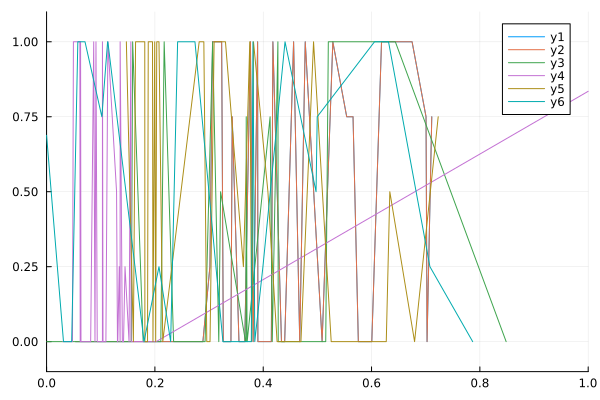

In [163]:
cmt_filepath = "S:\\Sync\\University\\2023_MRP_1\\MRP1_WorkDir\\data\\annotated\\r_cmt_stratified_annotated.csv"
cmt_df = CSV.read(cmt_filepath, DataFrame)

@show names(cmt_df)
#@show names(df_mean_scores)


# First we just want to look at the distribution of engagement scores and sentiment scores over time delta (duration between article posting and comment posting)

time_deltas = []
engagement_scores = []
sentiment_scores = []
for art_id in art_df[!, :article_id]
    art_publish_date = art_df[art_df[!,:article_id] .== art_id, :date_posted][1]
    #@show art_publish_date, replace.(replace.(art_publish_date,r"\.0" => ""),  r"\D" => "")
    art_publish_date =  Dates.unix2datetime(parse.(Int64, replace.(replace.(art_publish_date,r"\.0" => ""),  r"\D" => "")))
    
    art_cmts = cmt_df[cmt_df[!,:article_id] .== art_id, :]
    cmt_dates = art_cmts[!,:date]
    cmt_dates = Dates.unix2datetime.(cmt_dates)

    art_time_deltas = cmt_dates .- art_publish_date
    #@show art_publish_date, cmt_dates
    #@show art_time_deltas

    #Average engagement score of all comments with the same time delta value
    art_engagement_scores = []
    art_sentiment_scores = []

    unique_sorted_art_time_deltas = sort(unique(art_time_deltas))
    for time_delta in unique_sorted_art_time_deltas
        time_delta_mask = art_time_deltas .== time_delta
        push!(art_engagement_scores, mean(art_cmts[time_delta_mask, :engagement_score]))
        push!(art_sentiment_scores, mean(art_cmts[time_delta_mask, :sentiment_score]))
    end
    
    push!(time_deltas, Dates.value.(unique_sorted_art_time_deltas) / (1000 * 60 * 60 *24))
    push!(engagement_scores, art_engagement_scores)
    push!(sentiment_scores, art_sentiment_scores)
end

@show time_deltas[1], engagement_scores[1]

plt = plot(time_deltas[1], engagement_scores[1])
for i in 1:30:length(time_deltas)
    plot!(plt, time_deltas[i], engagement_scores[i])
end

xlims!(0, 1)
ylims!((-0.1, 1.1))

#@show plt

In [24]:

# Cumulative mean engagement score over time. We average the engagement scores of all comments with the same AND earlier time delta value
# In that sense we consider the mean over all comments that exist at that time delta value, including those that have been posted earlier.

time_deltas_buffer = []

for art_id in art_df[!, :article_id]
    art_publish_date = art_df[art_df[!,:article_id] .== art_id, :date_posted][1]
    art_publish_date =  Dates.unix2datetime(parse.(Int64, replace.(replace.(art_publish_date,r"\.0" => ""),  r"\D" => "")))
    art_cmts = cmt_df[cmt_df[!,:article_id] .== art_id, :]
    cmt_dates = art_cmts[!,:date]
    cmt_dates = Dates.unix2datetime.(cmt_dates)

    art_time_deltas = cmt_dates .- art_publish_date
    #art_time_deltas = abs.(cmt_dates .- art_publish_date)

    # Remove negative time deltas and their corresponding art_cmts rows
    full_art_time_deltas = art_time_deltas
    art_time_deltas = art_time_deltas[Dates.value.(art_time_deltas) .>= 0]
    art_cmts = art_cmts[Dates.value.(full_art_time_deltas) .>= 0, :]


    #Average engagement score of all comments with the same time delta value
    art_engagement_scores = []
    art_sentiment_scores = []

    unique_sorted_art_time_deltas = sort(unique(art_time_deltas))
    for time_delta in unique_sorted_art_time_deltas
        time_delta_mask = art_time_deltas .== time_delta
        push!(art_engagement_scores, mean(art_cmts[time_delta_mask, :engagement_score]))
        push!(art_sentiment_scores, mean(art_cmts[time_delta_mask, :sentiment_score]))
    end
    
    unique_sorted_art_time_deltas = round.(Int, Dates.value.(unique_sorted_art_time_deltas) / (1000 * 60 * 60))

    art_time_deltas = Dict() #Keys are time deltas, values are vectors of mean engagement scores, to be averaged later

    for i in 1:length(unique_sorted_art_time_deltas)
        time_delta = unique_sorted_art_time_deltas[i]
        engagement_score = art_engagement_scores[i]
        if time_delta in keys(art_time_deltas)
            push!(art_time_deltas[time_delta], engagement_score)
        else
            art_time_deltas[time_delta] = [engagement_score]
        end
    end
    push!(time_deltas_buffer, art_time_deltas)
end

@show length(time_deltas_buffer)

time_delta_values = sort(unique(vcat([collect(keys(art_dict)) for art_dict in time_deltas_buffer]...)))

cumul_time_delta_mean_scores = []
mean_scores_per_time_delta = []
std_scores_per_time_delta = []

for time_delta in time_delta_values
    for art_dict in time_deltas_buffer
        if time_delta in keys(art_dict)
            append!(cumul_time_delta_mean_scores, art_dict[time_delta])
        end
    end

    push!(mean_scores_per_time_delta, mean(cumul_time_delta_mean_scores))
    push!(std_scores_per_time_delta, std(cumul_time_delta_mean_scores))
end

plt = plot(time_delta_values, mean_scores_per_time_delta ,label="Mean", color=:black, xlabel="Time Delta (hours)", ylabel="Engagement Score", legned=:outerright, linewidth=2)
#xlims!(0, 72)
#display(plt)


#plt = plot(alpha=0.7, xlabel="Time Delta (hours)", ylabel="Engagement Score")
for art_dict in time_deltas_buffer[1:10:end]
    art_time_delta_values = collect(keys(art_dict))
    art_engagement_score_values = collect(values(art_dict))

    unzip(a) = Tuple([x[i] for x in a] for i in 1:2)

    pairs = zip(art_time_delta_values, art_engagement_score_values)  # Create tuples
    sorted_pairs = sort(collect(pairs); by = first)  # Sort tuples by first element
    art_time_delta_values, art_engagement_score_values= unzip(sorted_pairs)  # Unzip into two vectors

    #@show art_time_delta_values, [mean(el) for el in art_engagement_score_values]
    #@show size(art_time_delta_values), size(art_engagement_score_values)
    plot!(plt, art_time_delta_values, [mean(vcat(art_engagement_score_values[1:delta_idx]...)) for delta_idx in 1:length(art_time_delta_values)], alpha=0.5, label="Art $(findfirst(x-> x==art_dict, time_deltas_buffer))") 
end

xlims!(0, 48)

display(plt)


length(time_deltas_buffer) = 123

In [25]:
# Same for sentiment:

time_deltas_buffer = []

for art_id in art_df[!, :article_id]
    art_publish_date = art_df[art_df[!,:article_id] .== art_id, :date_posted][1]
    art_publish_date =  Dates.unix2datetime(parse.(Int64, replace.(replace.(art_publish_date,r"\.0" => ""),  r"\D" => "")))
    art_cmts = cmt_df[cmt_df[!,:article_id] .== art_id, :]
    cmt_dates = art_cmts[!,:date]
    cmt_dates = Dates.unix2datetime.(cmt_dates)

    art_time_deltas = cmt_dates .- art_publish_date
    #art_time_deltas = abs.(cmt_dates .- art_publish_date)

    # Remove negative time deltas and their corresponding art_cmts rows
    full_art_time_deltas = art_time_deltas
    art_time_deltas = art_time_deltas[Dates.value.(art_time_deltas) .>= 0]
    art_cmts = art_cmts[Dates.value.(full_art_time_deltas) .>= 0, :]


    #Average sentiment score of all comments with the same time delta value
    art_sentiment_scores = []

    unique_sorted_art_time_deltas = sort(unique(art_time_deltas))
    for time_delta in unique_sorted_art_time_deltas
        time_delta_mask = art_time_deltas .== time_delta
        push!(art_sentiment_scores, mean(art_cmts[time_delta_mask, :sentiment_score]))
    end

    unique_sorted_art_time_deltas = round.(Int, Dates.value.(unique_sorted_art_time_deltas) / (1000 * 60 * 60))

    art_time_deltas = Dict() #Keys are time deltas, values are vectors of mean engagement scores, to be averaged later
    for i in 1:length(unique_sorted_art_time_deltas)
        time_delta = unique_sorted_art_time_deltas[i]
        sentiment_score = art_sentiment_scores[i]
        if time_delta in keys(art_time_deltas)
            push!(art_time_deltas[time_delta], sentiment_score)
        else
            art_time_deltas[time_delta] = [sentiment_score]
        end
    end
    push!(time_deltas_buffer, art_time_deltas)
end

time_delta_values = sort(unique(vcat([collect(keys(art_dict)) for art_dict in time_deltas_buffer]...)))

cumul_time_delta_mean_scores = []
mean_scores_per_time_delta = []
std_scores_per_time_delta = []

for time_delta in time_delta_values
    for art_dict in time_deltas_buffer
        if time_delta in keys(art_dict)
            append!(cumul_time_delta_mean_scores, art_dict[time_delta])
        end
    end

    push!(mean_scores_per_time_delta, mean(cumul_time_delta_mean_scores))
    push!(std_scores_per_time_delta, std(cumul_time_delta_mean_scores))
end

plt = plot(time_delta_values, mean_scores_per_time_delta ,label="Mean", color=:black, xlabel="Time Delta (hours)", ylabel="Sentiment Score", legned=:outerright, linewidth=2)
#xlims!(0, 72)
#display(plt)


#plt = plot(alpha=0.7, xlabel="Time Delta (hours)", ylabel="Engagement Score")
for art_dict in time_deltas_buffer[1:10:end]
    art_time_delta_values = collect(keys(art_dict))
    art_sentiment_score_values = collect(values(art_dict))

    unzip(a) = Tuple([x[i] for x in a] for i in 1:2)

    pairs = zip(art_time_delta_values, art_sentiment_score_values)  # Create tuples
    sorted_pairs = sort(collect(pairs); by = first)  # Sort tuples by first element
    art_time_delta_values, art_sentiment_score_values= unzip(sorted_pairs)  # Unzip into two vectors

    #@show art_time_delta_values, [mean(el) for el in art_sentiment_score_values]
    #@show size(art_time_delta_values), size(art_sentiment_score_values)
    plot!(plt, art_time_delta_values, [mean(vcat(art_sentiment_score_values[1:delta_idx]...)) for delta_idx in 1:length(art_time_delta_values)], alpha=0.5, label="Art $(findfirst(x-> x==art_dict, time_deltas_buffer))") 
end

xlims!(0, 48)

display(plt)

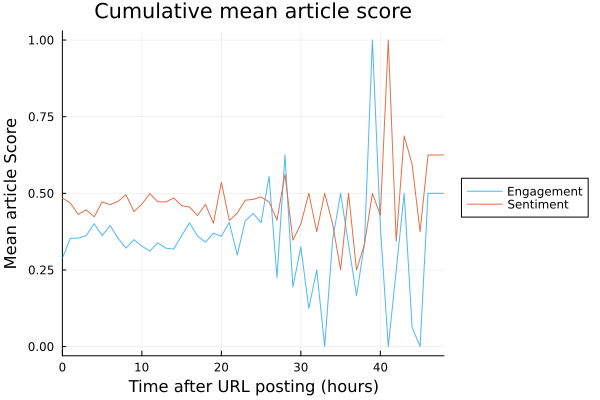

In [39]:
# Mean engagement score vs. time delta, averaged over all articles
# Compared to the previous plot, we average only at each time step without considering the scores at earlier time delta steps.
# In that sense, we see the average score of new comments at each time step, i.e. the change. This is not the same as the total mean over comments that exist at any instant of time.

mean_comment_count_per_time_delta = Dict()
engagement_time_deltas = Dict() #Keys are time deltas, values are vectors of mean engagement scores, to be averaged later
sentiment_time_deltas = Dict() 

for art_id in art_df[!, :article_id]
    art_publish_date = art_df[art_df[!,:article_id] .== art_id, :date_posted][1]
    art_publish_date =  Dates.unix2datetime(parse.(Int64, replace.(replace.(art_publish_date,r"\.0" => ""),  r"\D" => "")))
    art_cmts = cmt_df[cmt_df[!,:article_id] .== art_id, :]

    cmt_dates = art_cmts[!,:date]
    cmt_dates = Dates.unix2datetime.(cmt_dates)

    art_time_deltas = cmt_dates .- art_publish_date
    #art_time_deltas = abs.(cmt_dates .- art_publish_date)

    #if any(Dates.value.(art_time_deltas) .< 0)
    #    @show art_publish_date, cmt_dates
    #    @show art_time_deltas
    #end

    # Remove negative time deltas and their corresponding art_cmts rows
    full_art_time_deltas = art_time_deltas
    art_time_deltas = art_time_deltas[Dates.value.(art_time_deltas) .>= 0]
    art_cmts = art_cmts[Dates.value.(full_art_time_deltas) .>= 0, :]


    #Average engagement score of all comments with the same time delta value
    n_art_cmts_at_time_delta = []
    art_engagement_scores = []
    art_sentiment_scores = []

    unique_sorted_art_time_deltas = sort(unique(art_time_deltas))
    for time_delta in unique_sorted_art_time_deltas
        time_delta_mask = art_time_deltas .== time_delta
        push!(n_art_cmts_at_time_delta,  length(art_cmts[time_delta_mask, :comment_id]))
        push!(art_engagement_scores, mean(art_cmts[time_delta_mask, :engagement_score]))
        push!(art_sentiment_scores, mean(art_cmts[time_delta_mask, :sentiment_score]))
    end
    
    unique_sorted_art_time_deltas = round.(Int, Dates.value.(unique_sorted_art_time_deltas) / (1000 * 60 * 60))

    for i in 1:length(unique_sorted_art_time_deltas)
        time_delta = unique_sorted_art_time_deltas[i]
        engagement_score = art_engagement_scores[i]
        sentiment_score = art_sentiment_scores[i]
        if time_delta in keys(engagement_time_deltas)
            push!(engagement_time_deltas[time_delta], engagement_score)
        else
            engagement_time_deltas[time_delta] = [engagement_score]
        end
        if time_delta in keys(sentiment_time_deltas)
            push!(sentiment_time_deltas[time_delta], sentiment_score)
        else
            sentiment_time_deltas[time_delta] = [sentiment_score]
        end
        if time_delta in keys(mean_comment_count_per_time_delta)
            push!(mean_comment_count_per_time_delta[time_delta], n_art_cmts_at_time_delta[i])
        else
            mean_comment_count_per_time_delta[time_delta] = [n_art_cmts_at_time_delta[i]]
        end
    end
end

@show time_deltas

sorted_mean_comment_count_per_time_delta = Dict(time_delta => mean(mean_comment_count_per_time_delta[time_delta]) for time_delta in keys(mean_comment_count_per_time_delta))
#sorted_mean_comment_count_per_time_delta = sort(collect(mean_comment_count_per_time_delta))
#sorted_mean_comment_count_per_time_delta = [sorted_mean_comment_count_per_time_delta[i][2] for i in 1:length(sorted_mean_comment_count_per_time_delta)]
@show sorted_mean_comment_count_per_time_delta

sorted_engagement_time_delta_keys = sort(collect(keys(time_deltas)))
sorted_sentiment_time_delta_keys = sort(collect(keys(time_deltas)))

averaged_engagement_scores_over_time_deltas = Dict(time_delta => mean(engagement_time_deltas[time_delta]) for time_delta in keys(engagement_time_deltas))
averaged_sentiment_scores_over_time_deltas = Dict(time_delta => mean(sentiment_time_deltas[time_delta]) for time_delta in keys(sentiment_time_deltas))

engagement_time_delta_values = collect(keys(averaged_engagement_scores_over_time_deltas))
engagement_score_values = collect(values(averaged_engagement_scores_over_time_deltas))
sentiment_time_delta_values = collect(keys(averaged_sentiment_scores_over_time_deltas))
sentiment_score_values = collect(values(averaged_sentiment_scores_over_time_deltas))

unzip(a) = Tuple([x[i] for x in a] for i in 1:2)

pairs = zip(engagement_time_delta_values, engagement_score_values)  # Create tuples
sorted_pairs = sort(collect(pairs); by = first)  # Sort tuples by first element
time_delta_values, engagement_score_values= unzip(sorted_pairs)  # Unzip into two vectors

pairs = zip(sentiment_time_delta_values, sentiment_score_values)  # Create tuples
sorted_pairs = sort(collect(pairs); by = first)  # Sort tuples by first element
time_delta_values, sentiment_score_values= unzip(sorted_pairs)  # Unzip into two vectors

mean_comment_count_per_time_delta = Dict(time_delta => mean([length(engagement_time_deltas[time_delta]) for time_delta in keys(engagement_time_deltas)]) for time_delta in keys(engagement_time_deltas))

plt = plot(time_delta_values, engagement_score_values, label="Engagement",alpha=0.7, legend=:outerright, xlabel="Time after URL posting (hours)", ylabel="Mean article Score")
plot!(plt, time_delta_values, sentiment_score_values, label="Sentiment")
title!("Cumulative mean article score")
xlims!(0, 48)

In [40]:
@show sorted_mean_comment_count_per_time_delta

Dict{Int64, Float64} with 107 entries:
  5     => 1.0
  56    => 1.0
  35    => 1.0
  55    => 1.0
  17161 => 1.0
  30    => 1.0
  32    => 1.0
  6     => 1.0
  45    => 1.0
  73    => 1.0
  272   => 1.0
  251   => 1.0
  112   => 1.0
  267   => 1.0
  13    => 1.0
  4     => 1.00305
  363   => 1.0
  364   => 1.0
  91    => 1.0
  ⋮     => ⋮